# Normalization
### Feature Scaling with Normalization (use when range i.e min max is known.) and StandardScaler

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [14]:
df=pd.read_csv('https://raw.githubusercontent.com/Unstopable18/Datasets/main/Social_Network_Ads.csv')

In [15]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

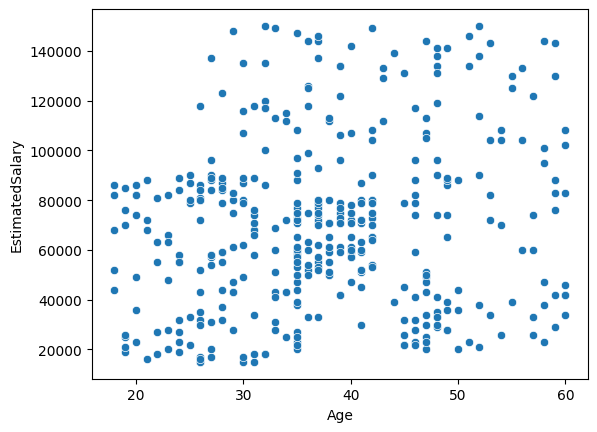

In [17]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])

In [18]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [20]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 53ms/step - loss: 10429.4932 - accuracy: 0.3469 - val_loss: 6777.8984 - val_accuracy: 0.4000
Epoch 2/100
10/10 [==============================] - 0s 18ms/step - loss: 4698.7793 - accuracy: 0.3469 - val_loss: 1410.9781 - val_accuracy: 0.4000
Epoch 3/100
10/10 [==============================] - 0s 15ms/step - loss: 770.2523 - accuracy: 0.5969 - val_loss: 1517.4010 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 17ms/step - loss: 921.1627 - accuracy: 0.6531 - val_loss: 105.0705 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 16ms/step - loss: 468.6904 - accuracy: 0.3344 - val_loss: 122.8033 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 220.0464 - accuracy: 0.5844 - val_loss: 90.1270 - val_accuracy: 0.4000
Epoch 7/100
10/10 [==============================] - 0s 20ms/step - loss: 79.1995 - accuracy: 0.4531 - val_loss: 68.5220

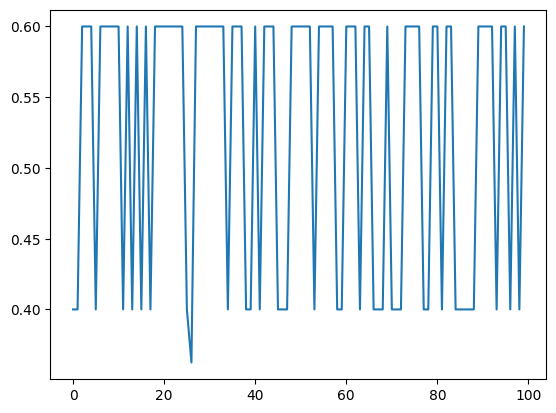

In [23]:
plt.plot(history.history['val_accuracy'])

# Standard Scaler

In [24]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 33ms/step - loss: 0.6697 - accuracy: 0.6438 - val_loss: 0.6331 - val_accuracy: 0.7750
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6205 - accuracy: 0.7781 - val_loss: 0.5829 - val_accuracy: 0.8375
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5790 - accuracy: 0.8219 - val_loss: 0.5400 - val_accuracy: 0.8625
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5448 - accuracy: 0.8313 - val_loss: 0.5027 - val_accuracy: 0.8375
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5107 - accuracy: 0.8562 - val_loss: 0.4744 - val_accuracy: 0.8125
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4831 - accuracy: 0.8656 - val_loss: 0.4470 - val_accuracy: 0.8125
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4571 - accuracy: 0.8625 - val_loss: 0.4229 - val_accuracy: 0.8125
Epoch 8/100

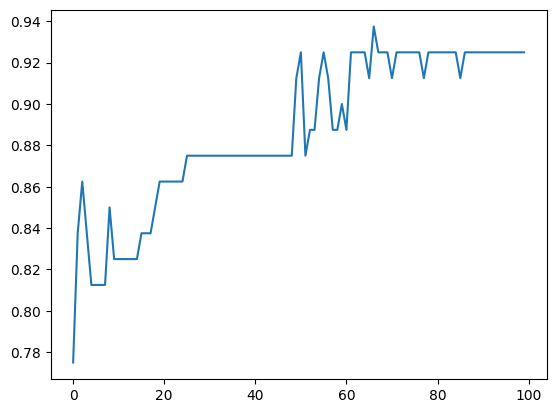

In [26]:
plt.plot(history.history['val_accuracy'])